# Gradient Descent
Gradient descent is an optimization algorithm used to minimize a function by iteratively adjusting its parameters in the direction of the steepest descent of the function. In simpler terms, it is like walking down a hill to find the lowest point.

The algorithm starts with an initial set of parameters and computes the gradient of the function at that point. The gradient is a vector that points in the direction of the steepest increase in the function. To minimize the function, we want to move in the opposite direction of the gradient, i.e., the direction of steepest descent.

The step size in the direction of the gradient is determined by a hyperparameter called the learning rate. A small learning rate means smaller steps, which may take longer to converge but are less likely to overshoot the minimum. A large learning rate means bigger steps, which may converge faster but may overshoot the minimum and cause the algorithm to oscillate around the minimum.

The algorithm iteratively updates the parameters in the direction of the negative gradient until the change in the function value becomes very small or the number of iterations reaches a maximum limit. At this point, the algorithm has found a local minimum of the function.

Gradient descent is widely used in machine learning to train models by minimizing the loss function. The loss function measures how well the model fits the data and is a function of the model's parameters. By minimizing the loss function using gradient descent, we can find the best set of parameters for the model that fit the data.
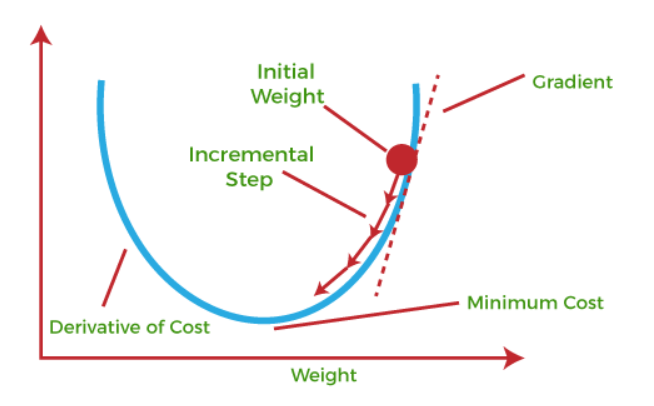, 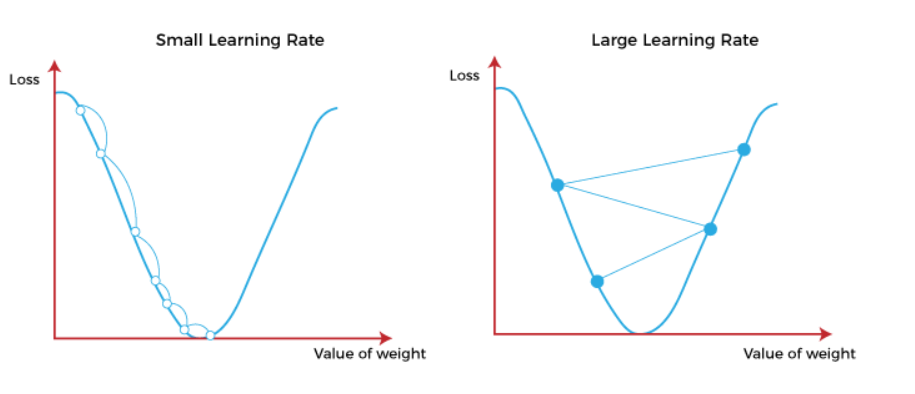

The starting point is just an arbitrary point for us to evaluate the performance. From that starting point, we will find the derivative (or slope), and from there, we can use a tangent line to observe the steepness of the slope. The slope will inform the updates to the parameters—i.e. the weights and bias. The slope at the starting point will be steeper, but as new parameters are generated, the steepness should gradually reduce until it reaches the lowest point on the curve, known as the point of convergence.   

Similar to finding the line of best fit in linear regression, the goal of gradient descent is to minimize the cost function, or the error between predicted and actual y. In order to do this, it requires two data points—a direction and a learning rate. These factors determine the partial derivative calculations of future iterations, allowing it to gradually arrive at the local or global minimum (i.e. point of convergence).

# Gradient Descent when b is a constant 1d

In [1]:
# making a small dataset
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

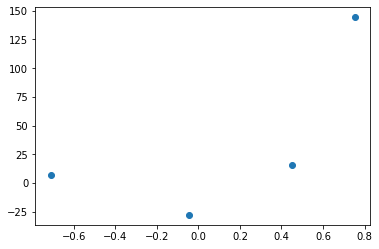

In [2]:
X, y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)
plt.scatter(X,y)

# First applying OLS
Done this in order to get the value of slope and intercept before-hand

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [4]:
reg.fit(X,y)

LinearRegression()

In [5]:
reg.coef_ #slope

array([78.35063668])

In [6]:
reg.intercept_ #y-intercept

26.15963284313262

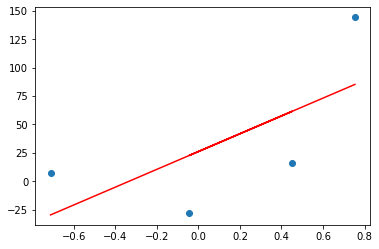

In [7]:
# best-fit line of the linear regression model as per the data
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color="red")

# Applying Gradient Descent
# For this notebook m is constant
Assuming the slope is 78.35 as above

and lets assume the y-intercept to be b=0 now we I need to make changes such that the value for b will be 26.15

Try b = 100 the result will be same i.e. the first line generated will be above the actual value and gradually the line will merege ar26.15. So this works with any random point. This is how gradient works in terms of gradient descent

In [8]:
y_pred = ((78.35 * X) + 0).reshape(4) # reshape gives all the values within in a single list
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

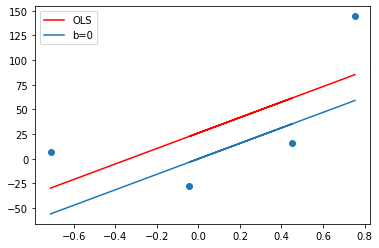

In [9]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color="red", label="OLS")
plt.plot(X,y_pred, label = "b=0") # below blue is the line when b=0
plt.legend()

# Now, gradient descent will be applied
You can see the blue line will slowly go near to red and fillay collapse in top of red

In [10]:
m=78.35
b=0
loss_slope = -2*np.sum(y-m*X.ravel()-b) # this is the mathematical formula used in sklearn that calculates the slope when b=0
loss_slope

-209.27763408209216

In [11]:
# Assume learning rate =0.1
lr = 0.1

step_size = loss_slope*lr
step_size

-20.927763408209216

In [12]:
# Calculating the new y-intercept i.e b
b = b - step_size
b # this is the new b point after applying the 0.1 as lr

20.927763408209216

In [13]:
y_pred1 = ((78.35*X)+b).reshape(4)
y_pred1

array([-34.88804496,  56.32726015,  17.44094722,  79.98535918])

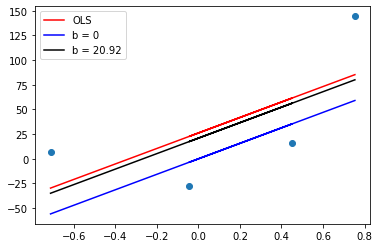

In [14]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color="red", label="OLS")
plt.plot(X, y_pred, color="blue", label = "b = 0")
plt.plot(X, y_pred1, color = "black", label = "b = 20.92")
plt.legend()

In [15]:
# Iteration 2 (calculating the solpe at new y intercept 20.92)
loss_slope = -2*np.sum(y-m*X.ravel()-b) # there the value of b is 20.92
loss_slope

-41.85552681641843

In [16]:
step_size = lr*loss_slope
step_size

-4.185552681641844

In [17]:
b = b - step_size
b # this is the new value of b now

25.11331608985106

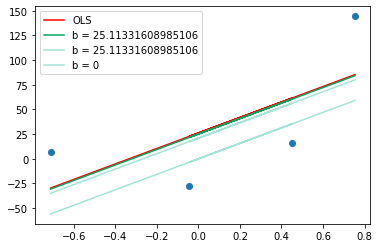

In [18]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [19]:
# Iteration 3
loss_slope = -2*np.sum(y-m*X.ravel()-b) # there the value of b is 25.11
loss_slope

-8.371105363283675

In [20]:
step_size = lr*loss_slope
step_size

-0.8371105363283675

In [21]:
b = b - step_size
b

25.95042662617943

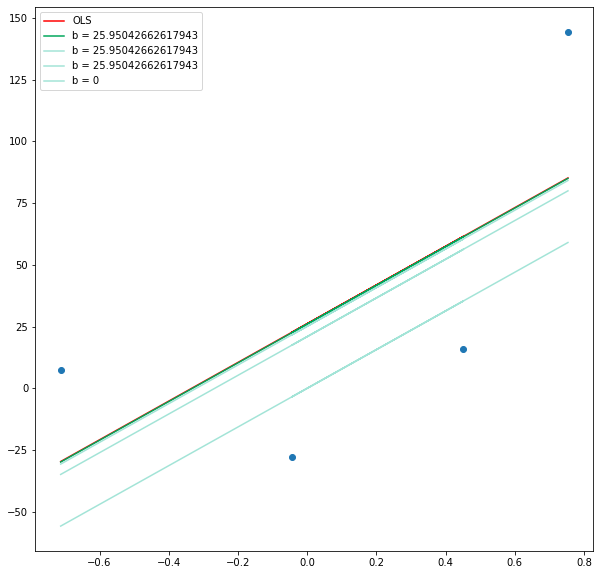

In [22]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(10,10))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()
# now doing this repeatedly will give the expected result i.e. b will be 26.15 exaclty

# Now I can put all the above process in one loop

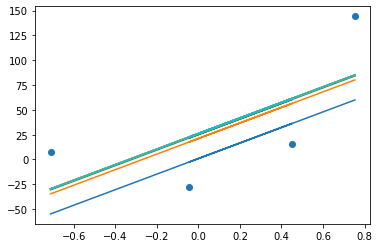

In [26]:
b = -100 # now i take -100 as a starting point
m = 78.35
lr = 0.1

epochs=10

for i in range(epochs):
    loss_slope = loss_slope = -2*np.sum(y-m*X.ravel()-b)
    step_size = lr*loss_slope
    b = b - step_size
    
    y_pred = m*X +b
    
    plt.plot(X,y_pred)
plt.scatter(X,y)
    

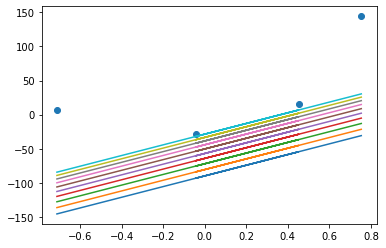

In [29]:
b = -100 
m = 78.35
lr = 0.01 # if you take small learning rate then you will never reach up to the acutal line 

epochs=10

for i in range(epochs):
    loss_slope = loss_slope = -2*np.sum(y-m*X.ravel()-b)
    step_size = lr*loss_slope
    b = b - step_size
    
    y_pred = m*X +b
    
    plt.plot(X,y_pred)
plt.scatter(X,y)
# below blue is the acutal line where it was started and before the loop ends it is not even close to the actual line
# important thing is if lr is less then you gotta ajust the no.of epochs to be high it will take take huge amout of time but
# eventually it will converge